# Name :N.Kushal Kumar 
# Reg no :21BCE9778



### importing data

In [1]:
import pandas as pd
df = pd.read_csv('Train_FVPL.csv')
df.head()

timeindex  flag  currentBack  motorTempBack  positionBack  refPositionBack  \
0          1     1         30.0             46    576.499377       581.499997   
1          2     1        101.0             42    576.499211       576.499999   
2          3     1        815.0             41    355.576792       363.368778   
3          4     1        219.0             40    577.499585       578.499998   
4          5     1         76.0             40      4.998796         9.000000   

   refVelocityBack  trackingDeviationBack  velocityBack  currentFront  \
0         7.000000               7.000623     10.000000          16.0   
1         9.000000               8.000747      7.000000          66.0   
2       584.045836               4.994664    587.020659         726.0   
3         7.000000               6.000332      8.041526         207.0   
4         6.000000               7.001246      6.000000         -13.0   

   motorTempFront  positionFront  refPositionFront  refVelocityFront  \
0              46     970.499907        971.499997         10.000000   
1              42     969.499450        969.499999          5.000000   
2              38     741.523412        742.361361        590.807348   
3              39     972.499575        971.499998          5.000000   
4              43     398.999076        398.000000          6.000000   

   trackingDeviationFront  velocityFront  
0                8.000125       5.000000  
1               10.000540      10.000000  
2                4.987812     593.415386  
3                7.000457       6.031144  
4                5.000914       8.000000

In [2]:
col_names = df.columns
col_names

Index(['timeindex', 'flag', 'currentBack', 'motorTempBack', 'positionBack',
       'refPositionBack', 'refVelocityBack', 'trackingDeviationBack',
       'velocityBack', 'currentFront', 'motorTempFront', 'positionFront',
       'refPositionFront', 'refVelocityFront', 'trackingDeviationFront',
       'velocityFront'],
      dtype='object')

In [3]:
X = df.drop(['flag'], axis=1)

y = df['flag']

#### splitting of the data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
cols = X_train.columns

#### visualization of correlation of variables

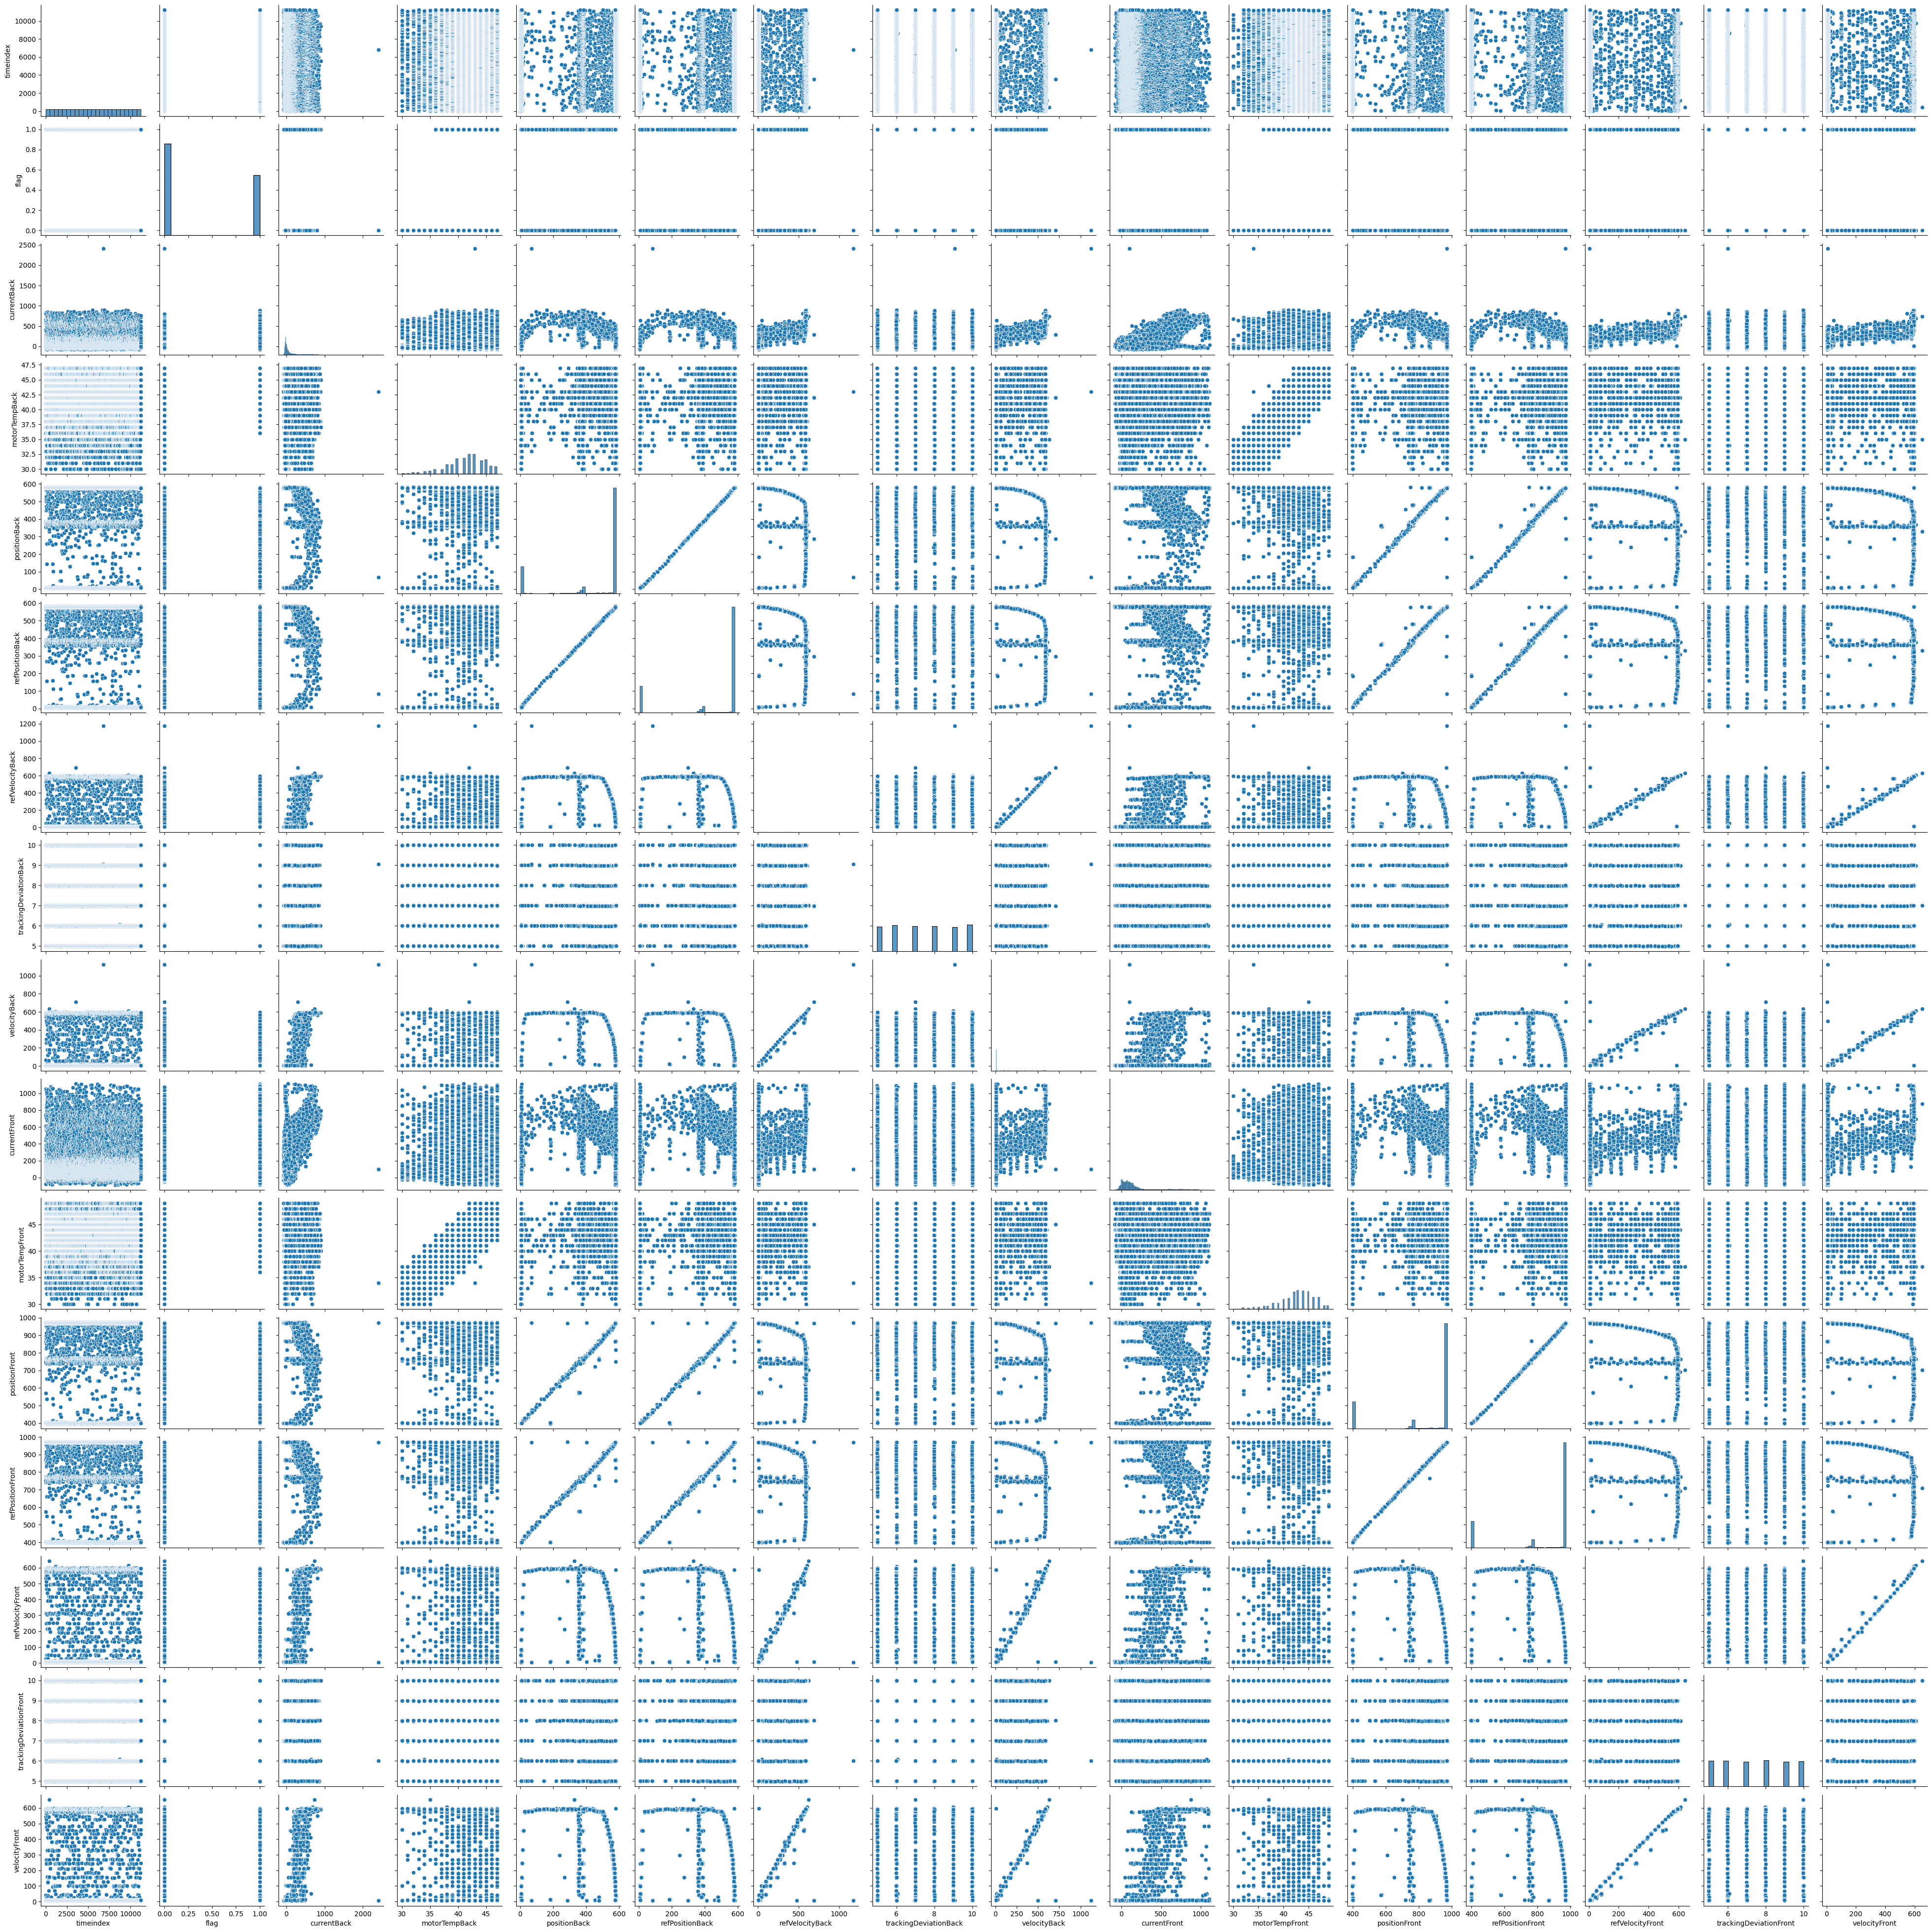

In [42]:
import seaborn as sns
sns.pairplot(df)

#### Box Plot

Text(0.5, 1.0, 'Box Plot of given data')

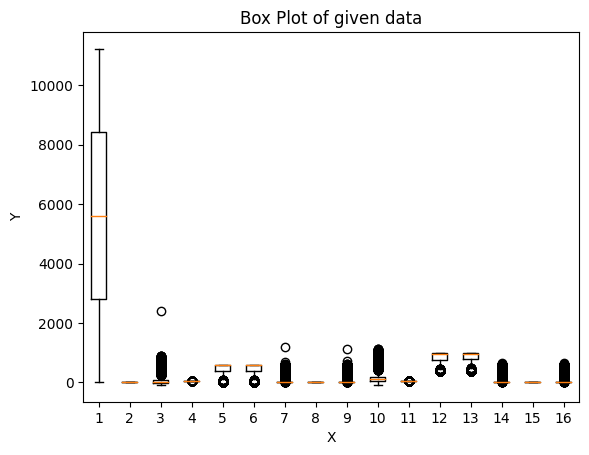

In [47]:
import matplotlib.pyplot as plt
plt.boxplot(df.values)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Box Plot of given data")

#### Comparing Varoius Classifiers to find out the best one

In [20]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [21]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 78.4951%
Log Loss: 2.7307458992292024


C:\Users\kushal\AppData\Local\Temp\ipykernel_24396\1011425804.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


SVC
****Results****
Accuracy: 59.9733%
Log Loss: 0.597386906164935


C:\Users\kushal\AppData\Local\Temp\ipykernel_24396\1011425804.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


NuSVC
****Results****
Accuracy: 75.8237%
Log Loss: 0.5421901272403875
DecisionTreeClassifier
****Results****
Accuracy: 86.2422%
Log Loss: 4.751772887812734


C:\Users\kushal\AppData\Local\Temp\ipykernel_24396\1011425804.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\kushal\AppData\Local\Temp\ipykernel_24396\1011425804.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


RandomForestClassifier
****Results****
Accuracy: 88.3348%
Log Loss: 0.28376263506758304


C:\Users\kushal\AppData\Local\Temp\ipykernel_24396\1011425804.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


XGBClassifier
****Results****
Accuracy: 91.9412%
Log Loss: 0.18267352029062497


C:\Users\kushal\AppData\Local\Temp\ipykernel_24396\1011425804.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


AdaBoostClassifier
****Results****
Accuracy: 84.8175%
Log Loss: 0.6561663609772231


C:\Users\kushal\AppData\Local\Temp\ipykernel_24396\1011425804.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


GradientBoostingClassifier
****Results****
Accuracy: 87.8451%
Log Loss: 0.2913497063351825
GaussianNB
****Results****
Accuracy: 62.6002%
Log Loss: 0.7854372173275909
LinearDiscriminantAnalysis
****Results****
Accuracy: 75.2004%
Log Loss: 0.5426169787172421
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 76.3134%
Log Loss: 0.5823158921257053


C:\Users\kushal\AppData\Local\Temp\ipykernel_24396\1011425804.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\kushal\AppData\Local\Temp\ipykernel_24396\1011425804.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\kushal\AppData\Local\Temp\ipykernel_24396\1011425804.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\kushal\AppData\Local\Temp\ipykernel_24396\1011425804.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


##### This clearly indicates us that xgboost gives us most accuary among the 11 best classifiers 

#### Logistic Regression 

In [11]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)


y_pred = logreg.predict(X)


print(y_pred)

[0 1 1 ... 0 0 0]


c:\Users\kushal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
logres = LogisticRegression()
logres.fit(X_train,y_train) # train data


# predict from test
log_pred = logres.predict(X_test)

# check accuracy
import sklearn.metrics as mt
mt.accuracy_score(log_pred,y_test)

c:\Users\kushal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7577916295636687

#### XGBoost Classifier

In [60]:
from sklearn.preprocessing import MaxAbsScaler
scaler_gnb = MaxAbsScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import RobustScaler
robust_scaler_data = RobustScaler().fit_transform(df.drop('flag', axis=1))
scaled_data = scaler.fit_transform(df.drop('flag', axis=1))
sdss = scaler_gnb.fit_transform(df.drop('flag', axis=1))
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(robust_scaler_data,y, test_size=0.33)

## On implementing the robust Scaler we get can get the most accurate outputs

import time
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train_xg, y_train_xg)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds_xgb = xgb.predict(X_test_xg)
prediction_end = time.perf_counter()
acc_xgb = (preds_xgb == y_test_xg).sum().astype(float) / len(preds_xgb)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 92.85
Time consumed for training: 0.550
Time consumed for prediction: 0.00526 seconds


In [48]:
feat_imp=pd.DataFrame(list(zip(list(xgb.feature_importances_),list(pd.DataFrame(X_train).columns))))
feat_imp.columns = ['score','feature']
feat_imp

score                 feature
0   0.000000               timeindex
1   0.999894             currentBack
2   0.000105           motorTempBack
3   0.000000            positionBack
4   0.000000         refPositionBack
5   0.000000         refVelocityBack
6   0.000000   trackingDeviationBack
7   0.000000            velocityBack
8   0.000000            currentFront
9   0.000000          motorTempFront
10  0.000000           positionFront
11  0.000000        refPositionFront
12  0.000000        refVelocityFront
13  0.000000  trackingDeviationFront
14  0.000000           velocityFront

#### applying Standard Scaler to the data for SVM

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_new = scaler.fit_transform(X_train)

X_test_new = scaler.transform(X_test)

In [7]:
X_train_new = pd.DataFrame(X_train_new, columns=[cols])
X_test_new = pd.DataFrame(X_test_new, columns=[cols])

In [8]:
X_train_new.describe()

timeindex   currentBack motorTempBack  positionBack refPositionBack  \
count  8.981000e+03  8.981000e+03  8.981000e+03  8.981000e+03    8.981000e+03   
mean   1.313329e-16 -2.136138e-17  5.553958e-16  7.446814e-17   -8.445656e-17   
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00    1.000056e+00   
min   -1.726990e+00 -9.113810e-01 -3.235411e+00 -2.081288e+00   -2.086504e+00   
25%   -8.640471e-01 -5.617540e-01 -6.758542e-01 -3.292076e-01   -3.102495e-01   
50%   -8.519433e-03 -4.060607e-01  1.773314e-01  5.587376e-01    5.563865e-01   
75%    8.568952e-01  1.731578e-02  7.461218e-01  5.679606e-01    5.656193e-01   
max    1.741157e+00  4.447746e+00  1.599307e+00  5.771954e-01    5.748521e-01   

      refVelocityBack trackingDeviationBack  velocityBack  currentFront  \
count    8.981000e+03          8.981000e+03  8.981000e+03  8.981000e+03   
mean    -7.041343e-17          3.200251e-16  3.085532e-17  2.373486e-18   
std      1.000056e+00          1.000056e+00  1.000056e+00  1.000056e+00   
min     -3.930357e-01         -1.463518e+00 -3.927400e-01 -1.151124e+00   
25%     -3.873838e-01         -8.696541e-01 -3.868538e-01 -6.073759e-01   
50%     -3.760799e-01         -2.869599e-01 -3.755508e-01 -3.398870e-01   
75%     -3.647760e-01          8.769781e-01 -3.642477e-01  6.792407e-02   
max      3.493644e+00          1.460156e+00  3.589054e+00  4.110954e+00   

      motorTempFront positionFront refPositionFront refVelocityFront  \
count   8.981000e+03  8.981000e+03     8.981000e+03     8.981000e+03   
mean   -9.616576e-16  1.728689e-16     1.521009e-16    -7.753389e-17   
std     1.000056e+00  1.000056e+00     1.000056e+00     1.000056e+00   
min    -3.448918e+00 -2.069307e+00    -2.074210e+00    -3.922192e-01   
25%    -4.238538e-01 -3.620347e-01    -3.430779e-01    -3.865940e-01   
50%     1.261579e-01  5.656997e-01     5.635401e-01    -3.753436e-01   
75%     6.761696e-01  5.749063e-01     5.727549e-01    -3.640932e-01   
max     1.776193e+00  5.841926e-01     5.819698e-01     3.194550e+00   

      trackingDeviationFront velocityFront  
count           8.981000e+03  8.981000e+03  
mean            3.955811e-16  4.272276e-17  
std             1.000056e+00  1.000056e+00  
min            -1.475561e+00 -3.927215e-01  
25%            -8.762050e-01 -3.868600e-01  
50%             2.814692e-01 -3.756044e-01  
75%             8.770761e-01 -3.643488e-01  
max             1.465208e+00  3.254723e+00

#### SVM Classifier

In [44]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train_new,y_train)


# make predictions on test set
y_pred=svc.predict(X_test_new)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("the Predictions of svm are ")
print(list(y_pred))

Model accuracy score with default hyperparameters: 0.8041
the Predictions of svm are 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0

In [10]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train_new,y_train)


# make predictions on test set
y_pred=svc.predict(X_test_new)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8317


In [12]:
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.7599536830854191


#### K-Nearest Neighbours Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

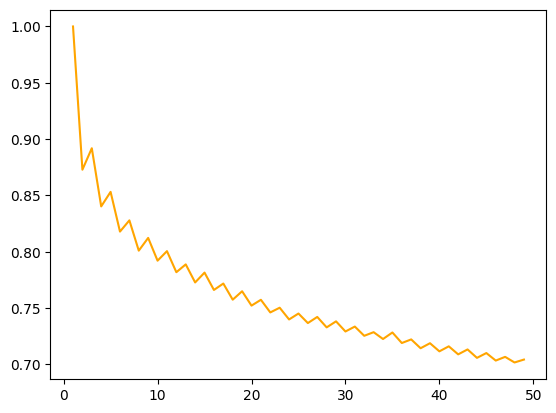

In [15]:
# For an optimal value of K for KNN

from sklearn import metrics
v=[]




k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Orange',)
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model with data
knn.fit(X, y)

kypred = knn.predict(X)

In [17]:
from sklearn import metrics
print(metrics.accuracy_score(y, kypred))

0.8918678186514652


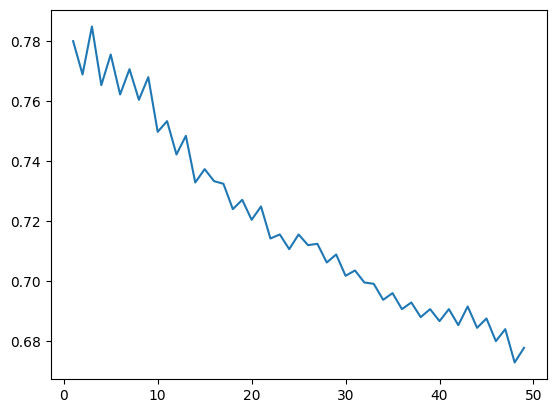

In [18]:
from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
# fit the model with data
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.7849510240427426

#### Random Forest Classifier

In [52]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 87.36
Time consumed for training: 0.221 seconds
Time consumed for prediction: 0.01070 seconds


#### Gaussian Naive Bayes Classifier

In [53]:
from sklearn.preprocessing import MaxAbsScaler

scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(df.drop('flag', axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sdss, df['flag'], test_size=0.33)

gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train_gnb, y_train_gnb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 62.91
Time consumed for training: 0.007 seconds
Time consumed for prediction: 0.00177 seconds


## Confusion Matrix of XGBoost Classifier

In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_xg, preds_xgb)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2148  100]
 [ 165 1292]]

True Positives(TP) =  2148

True Negatives(TN) =  1292

False Positives(FP) =  100

False Negatives(FN) =  165


<AxesSubplot: >

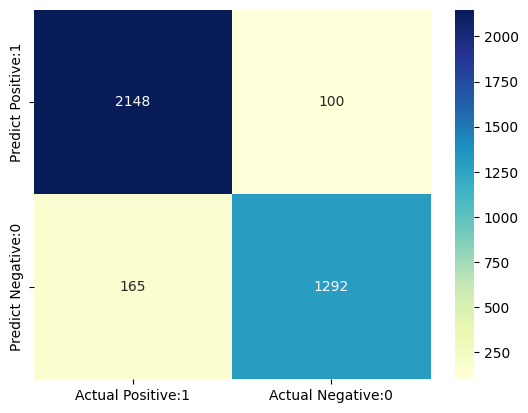

In [62]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification Metrics of XGBoost Classifier

#### Classification Report 

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test_xg, preds_xgb))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2248
           1       0.93      0.89      0.91      1457

    accuracy                           0.93      3705
   macro avg       0.93      0.92      0.92      3705
weighted avg       0.93      0.93      0.93      3705



#### Classification Accuracy

In [68]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [69]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9285


#### Classification Error

In [70]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0715


#### Precision

In [71]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9555


#### Recall

In [72]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9287


#### True Positive Rate

In [73]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9287


#### False Positivity rate

In [74]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0718


#### Specificity

In [75]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9282


#### f1-score

In [79]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Computing the F1 score
f1score = f1_score(y_test_xg, preds_xgb)

print("F1 score: {:.2f}".format(f1score))

F1 score: 0.91


#### ROC-AUC

##### ROC curve

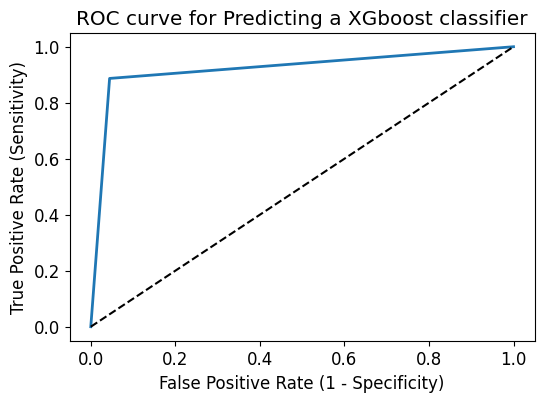

In [78]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_xg,preds_xgb)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a XGboost classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

##### ROC-AUC

In [76]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test_xg, preds_xgb)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9211


# Predicted Outputs of XGBoost Classifier

In [64]:
list(preds_xgb)

[0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
